In [1]:
%pip install importnb

Note: you may need to restart the kernel to use updated packages.


In [4]:
from importnb import Notebook
import PDSVRP_instance
import time
import pandas as pd

with Notebook():
    import solver
    import heuristic as h
    import utilities as u

In [2]:
def run_solver(instance):
    s = solver.PDSVRPModel(instance) 
    s.build_model()
    s.solve()
    cost_solver = s.model.objVal
    elapsed_time_solver = s.model.Runtime
    
    return cost_solver, elapsed_time_solver

In [16]:
def run_heuristic(instance):
    return h.SISSRs(instance, 0.3, 4.5, 4.5, 5,1,1,2,2, 0.1, 20, 0.1, 0.999975, 100, 1000, 3, 3, 9)

In [5]:
def run_scalability_tests(instances):
    results = []

    for instance_file_path in instances:
        instance = PDSVRP_instance.PDSVRPInstance(instance_file_path)
        
        cost_solver, elapsed_time_solver = run_solver(instance)
    
        start_time = time.time()
        sol = run_heuristic(instance)
        end_time = time.time()
        cost_heu = u.cost(instance, sol)
        cost_difference = ((cost_heu - cost_solver) / cost_solver) * 100
        elapsed_time_heuristic = end_time - start_time

        results.append({
            "instance": instance_file_path,
            "cost_solver": cost_solver,
            "cost_heuristic": cost_heu,
            "cost_difference_percentage": cost_difference,
            "time_solver": elapsed_time_solver,
            "time_heuristic": elapsed_time_heuristic,
        })
    
    return results

In [17]:
def save_results_to_csv(results, filename):
    df = pd.DataFrame(results)
    df.to_csv(filename, index=False)    

In [ ]:
instances = ["", "", "", "", ""]
filename = ""

results = run_scalability_tests(instances)
save_results_to_csv(results, filename)

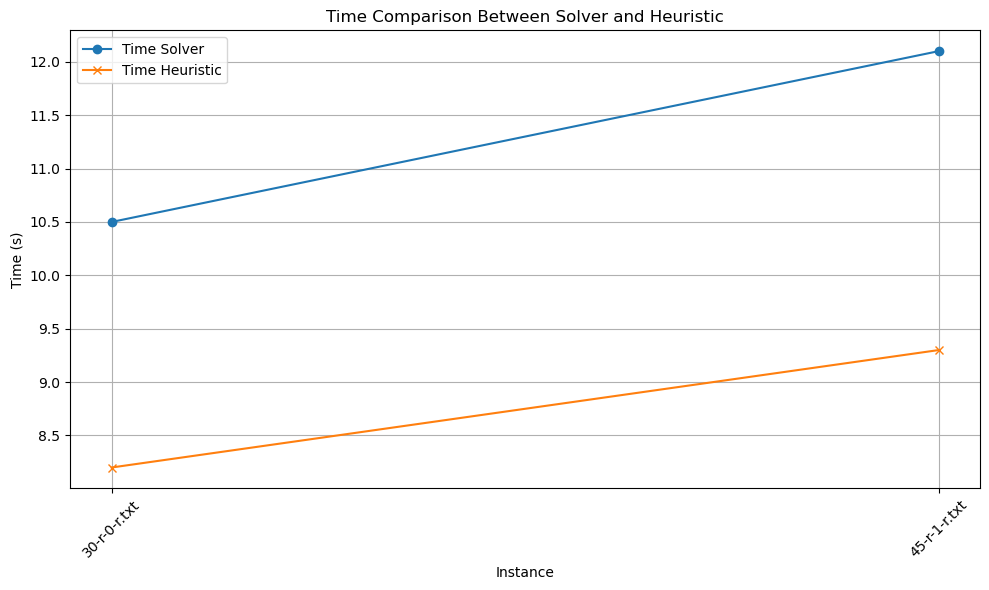

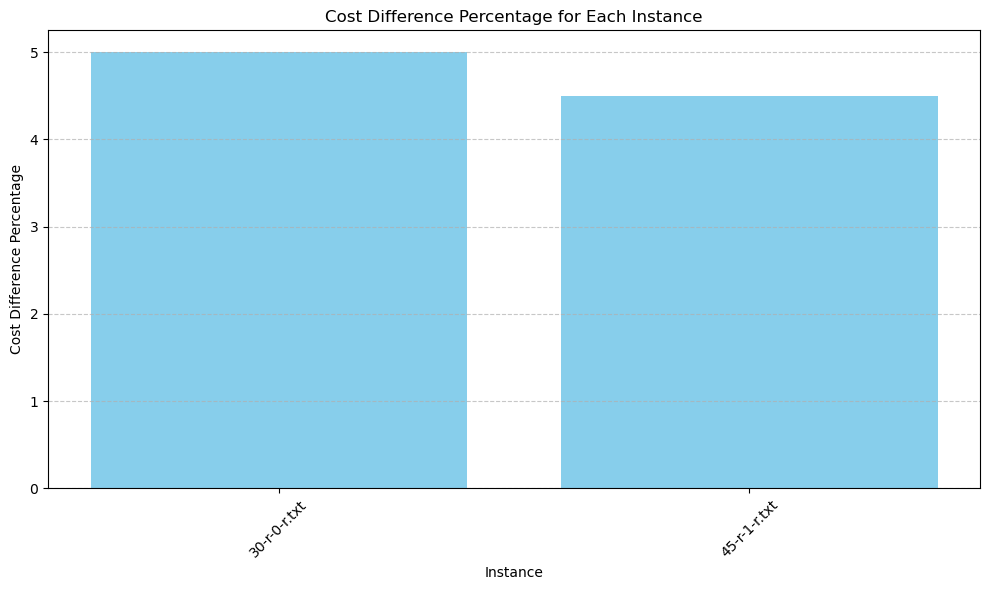

In [13]:
import matplotlib.pyplot as plt


'''# Sample data
results = [
    {
        "instance": "30-r-0-r.txt",
        "cost_solver": 100,
        "cost_heuristic": 95,
        "cost_difference_percentage": 5.0,
        "time_solver": 10.5,
        "time_heuristic": 8.2,
    },
    {
        "instance": "45-r-1-r.txt",
        "cost_solver": 110,
        "cost_heuristic": 105,
        "cost_difference_percentage": 4.5,
        "time_solver": 12.1,
        "time_heuristic": 9.3,
    },
    # Add more entries as needed
]
'''
# Extracting data
instances = [result["instance"] for result in results]
time_solver = [result["time_solver"] for result in results]
time_heuristic = [result["time_heuristic"] for result in results]
cost_difference_percentage = [result["cost_difference_percentage"] for result in results]


# Plotting
plt.figure(figsize=(10, 6))

plt.plot(instances, time_solver, label='Time Solver', marker='o')
plt.plot(instances, time_heuristic, label='Time Heuristic', marker='x')

plt.xlabel('Instance')
plt.ylabel('Time (s)')
plt.title('Time Comparison Between Solver and Heuristic')
plt.legend()
plt.xticks(rotation=45)  # Rotate instance names if they are too long
plt.grid(True)
plt.tight_layout()  # Adjust layout to make room for labels

# Show plot
plt.show()

# Plotting histogram
plt.figure(figsize=(10, 6))

plt.bar(instances, cost_difference_percentage, color='skyblue')

plt.xlabel('Instance')
plt.ylabel('Cost Difference Percentage')
plt.title('Cost Difference Percentage for Each Instance')
plt.xticks(rotation=45)  # Rotate instance names if they are too long
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()  # Adjust layout to make room for labels

# Show plot
plt.show()
